In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

/kaggle/input/flowers-dataset/sample_submission.csv
/kaggle/input/flowers-dataset/test/Image_747.jpg
/kaggle/input/flowers-dataset/train/dandelion/16242239484_51286673af.jpg
/kaggle/input/flowers-dataset/train/daisy/8882282142_9be2524d38_m.jpg
/kaggle/input/flowers-dataset/train/sunflower/8249000137_eddfffa380_n.jpg
/kaggle/input/flowers-dataset/train/tulip/8757486380_90952c5377.jpg
/kaggle/input/flowers-dataset/train/rose/6108118824_5b0231a56d.jpg


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
# Load dataset
train_dataset = torchvision.datasets.ImageFolder(root='/kaggle/input/flowers-dataset/train/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [4]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2746
    Root location: /kaggle/input/flowers-dataset/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [5]:
# Load pre-trained VGG19 model
model = models.vgg19(pretrained=True)

# Freeze the convolutional layers
for param in model.parameters():
    param.requires_grad = False

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Modify the classifier to fit the number of classes (5 classes in this case)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 5)

In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [19]:
# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 5
train_losses = []

In [20]:
device

device(type='cuda')

In [21]:
from tqdm import tqdm

Epoch [5/5], Loss: 0.3636: 100%|██████████| 86/86 [00:28<00:00,  3.05it/s]


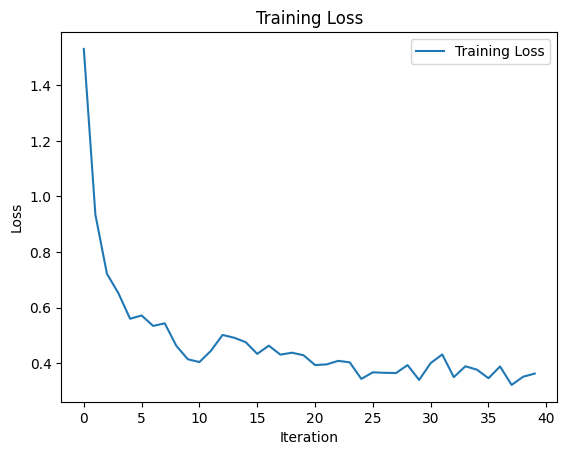

In [22]:
for epoch in range(num_epochs):
    running_loss = 0.0
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, data in pbar:
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 10 == 9:
                train_loss = running_loss / 10
                train_losses.append(train_loss)
                pbar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
                running_loss = 0.0

# Plot training history
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [23]:
# Save the trained model
torch.save(model.state_dict(), 'vgg19_flower_classification.pth')
print("Model saved successfully.")

Model saved successfully.


# TEST

In [24]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the saved model
model = models.vgg19(pretrained=False)  # Create an instance of VGG19 model
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 5)  # Modify the classifier to fit the number of classes
model.load_state_dict(torch.load('/kaggle/working/vgg19_flower_classification.pth'))
model.eval()  # Set model to evaluation mode

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
# Define class labels
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Preprocess the new image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [27]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Path to the new image
image_path = '/kaggle/input/flowers-dataset/train/dandelion/10043234166_e6dd915111_n.jpg'

# Preprocess the new image
image_tensor = preprocess_image(image_path)

# Make predictions
with torch.no_grad():
    output = model(image_tensor)

# Convert output probabilities to predicted class
_, predicted_idx = torch.max(output, 1)
predicted_class = class_names[predicted_idx.item()]

print(f'Predicted class: {predicted_class}')

Predicted class: dandelion


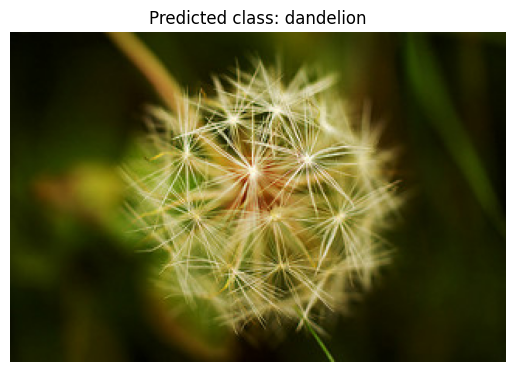

In [28]:
# Load the image
image = Image.open(image_path)

# Define a function to show the image with the predicted class label
def show_image(image, predicted_class):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()

# Show the image with the predicted class label
show_image(image, predicted_class)